<a href="https://colab.research.google.com/github/Evianitary18/SQL-Lite/blob/main/Evianita_Rifka_Yulistia_01_Praktik1_Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Study Case**

Anda merupakan seorang Junior Data Analyst di sebuah perusahaan minuman asal Amerika. Sebagai seorang junior, Anda diminta untuk bertanggung jawab terhadap analisa penjualan perusahaan khususnya di negara bagian Iowa. Sebelumnya, Supervisor meminta Anda untuk melakukan beberapa pembaharuan di database penjualan.

Untuk itu, Anda diminta untuk melakukan beberapa hal berikut pada Google Collab :



1. Upload dan akses database berikut ini : LINK

2. Buang tabel yang tidak ada kaitannya dengan database tersebut

3. Selanjutnya, buat 1 tabel baru dengan nama “stock”, kemudian masukan data yang tertera pada tabel di bawah ini secara MANUAL. Berikut adalah ketentuan dalam pembuatan tabel

Kolom 1 dengan nama item_description dengan tipe data VARCHAR
Kolom 2 dengan nama stock_available dengan tipe data INT
Kolom 3 dengan nama grade_rating dengan tipe data FLOAT
Seluruh kolom tidak boleh memiliki nilai NULL/NA

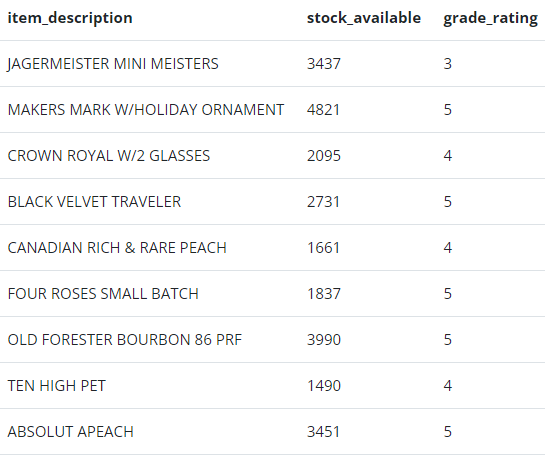

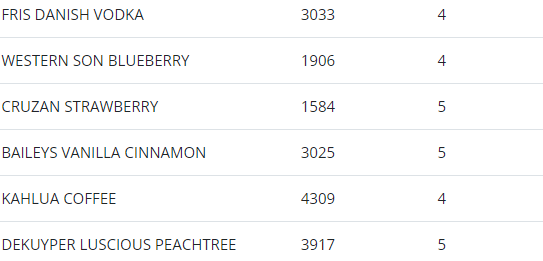

In [5]:
import sqlite3
import pandas as pd

In [26]:
# Membuat database connection
connection1=sqlite3.connect("iowa_sales.db")

Melihat tabel yang ada pada database iowa_sales.db

In [27]:
cursor = connection1.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('employee',)]


Karena table employee tidak diperlukan, kita hapus saja table employee.

In [28]:
cursor.execute("DROP TABLE employee")

Membuat table baru bernama stock

In [29]:
cursor.execute('''
CREATE TABLE stock (
  item_description VARCHAR NOT NULL,
  stock_available INT NOT NULL,
  grade_rating FLOAT NOT NULL
)
''')

In [30]:
# Mengecek apakah tabel sudah terbuat/terisi
pd.read_sql_query("SELECT * from stock", connection1)

,item_description,stock_available,grade_rating


Memasukkan data secara manual ke tabel baru

In [31]:
data = [
    ('JAGERMEISTER MINI MEISTER', 3437, 3),
    ('MAKERS MARK W/HOLIDAY ORNAMENT', 4821, 5),
    ('CROWN ROYAL W/2 GLASSES', 2095, 4),
    ('BLACK VELVET TRAVELER', 2731, 5),
    ('CANADIAN RICH & RARE PEACH', 1661, 4),
    ('FOUR ROSES SMALL BATCH', 1837, 5),
    ('OLD FORESTER BOURBON 86 PRF', 3990, 5),
    ('TEN HIGH PET', 1490, 4),
    ('ABSOLUT APEACH', 3451, 5),
    ('FRIS DANISH VODKA', 3033, 4),
    ('WESTERN SON BLUEBERRY', 1906, 4),
    ('CRUZAN STRAWBERRY', 1548, 5),
    ('BAILEYS VANILLA CINNAMON', 3025, 5),
    ('KAHLUA COFFEE', 4309, 4),
    ('DEKUYPER LUSCIOUS PEACHTREE', 3971, 5)
]

cursor.executemany('INSERT INTO stock (item_description, stock_available, grade_rating) VALUES (?, ?, ?)', data)

In [32]:
# Melihat apakah data sudah berhasil dimasukkan
cursor.execute('SELECT * FROM stock')
rows = cursor.fetchall()

for row in rows:
    print(row)

('JAGERMEISTER MINI MEISTER', 3437, 3.0)
('MAKERS MARK W/HOLIDAY ORNAMENT', 4821, 5.0)
('CROWN ROYAL W/2 GLASSES', 2095, 4.0)
('BLACK VELVET TRAVELER', 2731, 5.0)
('CANADIAN RICH & RARE PEACH', 1661, 4.0)
('FOUR ROSES SMALL BATCH', 1837, 5.0)
('OLD FORESTER BOURBON 86 PRF', 3990, 5.0)
('TEN HIGH PET', 1490, 4.0)
('ABSOLUT APEACH', 3451, 5.0)
('FRIS DANISH VODKA', 3033, 4.0)
('WESTERN SON BLUEBERRY', 1906, 4.0)
('CRUZAN STRAWBERRY', 1548, 5.0)
('BAILEYS VANILLA CINNAMON', 3025, 5.0)
('KAHLUA COFFEE', 4309, 4.0)
('DEKUYPER LUSCIOUS PEACHTREE', 3971, 5.0)


In [33]:
connection1.commit()

In [34]:
connection1.close()

4. Setelah Anda membuat tabel dengan nama “stock”, Anda diminta untuk membuat 1 tabel lagi dengan nama “sales” dari file Excel berikut ini : LINK

5. Selanjutnya, tambahkan kolom “rating” pada table “sales” dengan tipe data FLOAT

6. Lakukanlah beberapa pembaharuan dengan ketentuan sebagai berikut :

Data pada variabel pack yang memiliki category_name CREAM LIQUEURS diubah menjadi 40
Data pada variabel sale_dollars yang memiliki  item_descriptions TITOS HANDMADE VODKA diubah menjadi 400
Data pada variabel item _description yang memiliki category_name AMERICAN VODKAS menjadi MCCORMICK 80PRF VODKA
Entry data yang memiliki nilai bottles_sold kurang dari 20 dihapus
Entry data yang memiliki nilai sale_dollars kurang dari 100 dan lebih dari 1000 dihapus

In [38]:
import pandas as pd
import sqlite3

# Baca file Excel
sales_data = pd.read_excel('Iowa_sales.xlsx')

# Buat database SQLite
conn = sqlite3.connect('iowa_sales.db')
cursor = conn.cursor()

In [46]:
# Buat tabel sales dengan kolom rating
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    store_number INT,
    store_name INT,
    city INT,
    county FLOAT,
    category_name VARCHAR,
    item_number FLOAT,
    item_description VARCHAR,
    pack FLOAT,
    bottle_volume_ml FLOAT,
    state_bottle_cost FLOAT,
    state_bottle_retail FLOAT,
    bottles_sold FLOAT,
    sale_dollars FLOAT,
    rating FLOAT
)
''')

In [50]:
sales_data = sales_data.drop(columns=['store_number'])

In [51]:
sales_data.to_sql('sales', conn, if_exists='append', index=False)

OperationalError: table sales has no column named store_name